
# [Introduction to Data Science: A Comp-Math-Stat Approach](https://lamastex.github.io/scalable-data-science/as/2019/)
## YOIYUI001, Summer 2019
&copy;2019 Raazesh Sainudiin. [Attribution 4.0 International (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/)


# Retweet Ideological Process

The first part of the notebook resulted in discussions between Lucas Gerin, Raazesh Sainudiin and Amandine Veber in 2016 at CMAP, Ecole Polytechnique, Palaiseau, France.

This is the code for the project on coevolution of retweet transmission trees and ideological networks in twitter.


This notebook further goes through the digraphs documentation and jots down the commands one may need (and a lot more commands that may be useful for insights and visualizations).

A minimal tour of the digraphs documentation in SageMath is in the following:

* [http://doc.sagemath.org/html/en/reference/graphs/index.html](http://doc.sagemath.org/html/en/reference/graphs/index.html)
* [http://doc.sagemath.org/html/en/reference/graphs/sage/graphs/digraph.html](http://doc.sagemath.org/html/en/reference/graphs/sage/graphs/digraph.html)
* [http://doc.sagemath.org/html/en/reference/graphs/sage/graphs/graph_input.html](http://doc.sagemath.org/html/en/reference/graphs/sage/graphs/graph_input.html)

# A More Complex Model 

* For a given $2 < n < \infty$, Let $d(z)$ be a directed graph  at discrete time $z \in \mathbb{Z_+}:=\{0,1,2,...\}$ with
    * a constant vertex set of labelled individuals $\mathbb{I}_n(z) = \mathbb{I}_n :=\{\imath_1,\ldots,\imath_n\}$ and
    * time-varying set of arcs or directed edges be $a(z) \subseteq \mathbb{I}_n \times \mathbb{I}_n$.
* Let $d(z):=(\mathbb{I}_n,a(z))$ represent the *retweet ideological network (RIN)* at discrete time $z$. Note that this is not the usual followers network in twitter as retweet of a tweet by $\imath_i$ by her follower $\imath_j$ can be retweeted by a follower of $\imath_j$ who does not directly follow $\imath_i$.  Moreover, retweets are possible directly from online content that allow sharing via retweets.
* Let the *retweet counts* of each vertex $\imath_i$ at time $z$ be $r_i(z):=(r_{i,1}(z),\ldots,r_{i,n}(z)) \in \mathbb{Z}_+^n$.  Thus the retweet counts $r_i(z)$ tracks the number of retweets by vertex $\imath_i$ of the original tweet emanating from each vertex up to time $z$, i.e., $r_{i,j}(z)$ is the total number of retweets by individual $\imath_i$ of the original tweets emanating from individual $\imath_j$ by time $z$.
* Let us denote the empirical measure of the retweet counts at individual $\imath_i$ at time $z$ by $\hat{r}_i(z) := (\hat{r}_{i,1}(z),\ldots, \hat{r}_{i,n}(z)) = \left( \frac{r_{i,1}(z)}{\sum_{m=1}^n r_{i,m}(z)} ,\ldots, \frac{r_{i,n}(z)}{\sum_{m=1}^n r_{i,m}(z)} \right)$
* Emanation of original tweets:
    * Let $\lambda_i$ denote the Exponential rate at which individual $\imath_i$ tweets, i.e., creates and transmits original tweets. Note that we can have a set of silent individuals when $\lambda_i=0$ for each $i \in \mathbb{I}_{\mathrm{silent}}\subseteq \mathbb{I}$.
    * Let $\Lambda := \sum_{i=1}^n \lambda_i$
* retweet ideological distance
    * Let $\delta_{i,j}(z)$ denote the preferential bias of i to retweet j and we take these to be given in the model. Empirically, we will let $\delta_{i,j}(z) = \delta(r_i(z),r_j(z))$ be a inverse distance between the retweet counts of $\imath_i$ and $\imath_j$ at time $z$. We can take $\delta$ to be the $1-L_1$ distance between the empirical measures such as $\delta_{i,j}(z) = 1-\frac{1}{2} \sum_{k=1}^n{\left| \hat{r}_{i,k}(z) - \hat{r}_{j,k}(z) \right|}$
    * Actually $r_i(z)$ needs to be a $0,1$-valued matrix at each vertex to track which tweet $k$ (given by columns of $r_i$) of which source vertex $j$ (given by rows of $r_i$) has already been retweeted as indicqted by $r_{i,j,k}(z)=1$ by the given vertex $i$.
* A Hawkes Mechanism for retweets / a discretizable one:
    * each original tweet reaches its out neighbours and gets retweeted by its outneighbours in a self-exciting manner along the reachable nodes of the source node.
* Mechanism for arc change:
    * some rate for arc-change
    * arc-deletion: every current arc $(i,j)$ gets deleted at a rate $\beta_j$ times the distance between the "opinions" of $i$ and $j$. The larger $\beta_j$, the faster $j$ will break the link with nodes that don't think alike. We want $\beta$ to be of the same order as the inverse of the number of nodes, so that the dynamics of edge changes is much slower than the retweets dynamics.
    * arc-addition: just the same (possibly with a different parameter $\alpha_j$).
* Discrete Jump chain: the next event is one of:
    * an original tweet - with probability $\frac{\Lambda}{\Lambda+\Phi+\Xi}$ and a specific individual $\imath_i$ tweets with probability $\lambda_i/\Lambda$
    * a retweet
    * an arc-change
* Continuous-time *retweet transmission forests*
    * Let the sequence of original tweets by individual $\imath_i$ coupled with its continuous time-stamp of origin be denoted by $(\tau_{i,1}, t_{i,1}),(\tau_{i,2},t_{i,2}),\ldots$.
    * Each original tweeter, tweet and its time-stamp of origin given by $(\imath_i, \tau_{i,m},t_{i,m})$ becomes the root node of a *retweet transmission tree*
    * Every retweet of the original tweet $\tau_{i,m}$ by any individual $\imath_j$ at time $t_{i,m,j}$ will be added as a child node $(\imath_j,t_{i,m,j})$ of the retweet transmission tree with root node $(\imath_i,\tau_{i,m},t_{i,m})$.
    * The nodes within each tree will be ordered by the retweet time-stamps.
    * This leads to a forest of trees.

**Other considerations**
* Let there be a law for number of incoming arcs into individual $\imath_i$ (most individuals cannot and DO NOT follow everyone in the population!)

# Simple Model for Emergence of Echo Chambers by a Dynamic Homophilous Network

We will next make a much simpler model for the emergence of echo-chambers in a dynamically evolving social network as follows:

* make a random network G on n nodes (start from complete network or digraph with n nodes and drop some edges according to a thinning probability)
* assign vertices in G to two colours '0' and '1' with prob, say 0.5 (we take first $0,1,\ldots,\lfloor pn\rfloor$ nodes as '1' and the rest as '0' for easy identification, WLOG).
* iterate through discrete transitions of the Markov chain as follows:
    * with a small 'surfingProb' choose an edge at random to add or delete with equal prob (this is just to ensure irreducibility of the Markov chain)
    * with the remaining probability choose an edge for potential rewiring (potentially deleting it and attaching it to a random node), where the deletion probability is:
        * high if the homophily probability is high and the nodes making the edge are either 0->1 or 1->0
    * the stationary distribution is expected to be the simplest one-parameter planted partition model (see [https://en.wikipedia.org/wiki/Stochastic_block_model](https://en.wikipedia.org/wiki/Stochastic_block_model)) with:
        * the diagonal or intra-block probability = homophily probability and
        * the off-diagonal or inter-block probability = 1 - homophily probability.

With this model we hope to create a highly structured or segregated network at stationarity if the homophily parameter is large. The simulations confirm this. Let's try to make this more rigorous and perhaps find a critical threshold value for homophily, etc...

## Stochastic block models

* [Community Detection in Graphs - Review](https://arxiv.org/abs/0906.0612)
* [https://en.wikipedia.org/wiki/Stochastic_block_model](https://en.wikipedia.org/wiki/Stochastic_block_model)

## Code for the Simple Model

In [1]:
import numpy as np

def thinEdges(G,p):
    '''remove each edge with prob 1-p and return it as a list'''
    removedEdges=[];
    presentEdges=[];
    for E in G.edge_iterator():
        edgeE=(E[0],E[1])
        if random() > p:
            removedEdges.append(edgeE)
            G.delete_edge(edgeE)
        #else:
        #    presentEdges.append(edgeE)
    return removedEdges#,presentEdges

def makeNodeColors(G,p):
    '''color node v in G with color 1 with prob p and color 0 with prob 1-p'''
    N=g.order();# number of nodes
    Gc = np.zeros(N); # List to store colors
    for v in G.vertex_iterator():
        assert(v >= 0 and v < N)
        #if random() < p:
        if v < floor(p*N):
            Gc[v] = 1
    return Gc

def RandomVertexPair(G,NumTrials):
    '''return a pair of vertices as an edge not in digraph G by at most NumTrials'''
    it = G.random_vertex_iterator()
    for i in range(NumTrials):
        u,v=(next(it),next(it))
        if not (G.has_edge(u,v)):
            break
    return (u,v)

def RandomOutEdgeOfGivenVertex(G,u,Vset):
    '''return a random out edge of vertex u that is not in digraph G and not a self-loop with Vertex set Vset'''
    #Vset = set(range(G.order()))
    outgoingESet = set([E[1] for E in G.outgoing_edge_iterator([u])])
    outgoingESet.add(u) # to avoid self-loops
    diffVs=list(Vset.difference(outgoingESet))
    NumOfNewOutNeighbors=len(diffVs)
    assert(NumOfNewOutNeighbors>0)
    return (u,diffVs[floor(random()*NumOfNewOutNeighbors)])

def EvolveHomophilousNetwork(G,Gc,homophilProb, surfingProb, k):
    '''k steps of the network evolution where Prob(keeping homophylous edge) = P(edge 0->0) = P(edge 1->1)  = homophilProb'''
    Vset = set(range(G.order())) # vertex set is fixed
    assert(Vset==set(G.vertices())) # checking vertex labels are from 0 to g.order()-1
    for i in range(k):
        #print i,G.order(),G.size()
        if random() < surfingProb: # try to add an edge that is not there or delete one that is there with small prob to ensure irreducibility
            if random() < 0.5: # add new edge at random
                u,v = RandomVertexPair(G,100)
                G.add_edge(u,v)
            else: # delete edge at random
                if G.size()>0:
                    u,v = G.random_edge(labels=False)
                    G.delete_edge((u,v))
        else: # choose an edge for potential deletion (perhaps rewiring?)
            if G.size()>0:
                u,v = G.random_edge(labels=False)
                assert(G.has_edge(u,v))
                edgeDiversity=abs(Gc[u]-Gc[v])
                if edgeDiversity == 0:
                    edgeRetentionProb = homophilProb
                else:
                    edgeRetentionProb = 1-homophilProb
                if random() > edgeRetentionProb:
                    G.delete_edge((u,v))
                    # rewire (u,w) for w randomly chosen from all nodes not connected to u
                    u,w = RandomOutEdgeOfGivenVertex(G,u,Vset)
                    G.add_edge(u,w)

def EvolveHomophilousNetworkWithConstantSize(G,Gc,homophilProb, surfingProb, k):
    '''k steps of the network evolution where Prob(keeping homophylous edge) = P(edge 0->0) = P(edge 1->1)  = homophilProb'''
    Vset = set(range(G.order())) # vertex set is fixed
    assert(Vset==set(G.vertices())) # checking vertex labels are from 0 to g.order()-1
    for i in range(k):
        #print "before ",i,G.order(),G.size()
        currentSize=G.size() # current number of edges
        if random() < surfingProb:
            # try to add an edge that is not there AND delete one that is there
            # with small prob to ensure irreducibility within state space constrained by same number of edges
            # add new edge at random
            u,v = RandomVertexPair(G,100)
            G.add_edge(u,v)
            updatedSize=G.size() # updated number of edges
            #print "edge added"
            # delete edge at random
            if ( (updatedSize>0) and ((updatedSize-currentSize)==1)):
                u,v = G.random_edge(labels=False)
                G.delete_edge((u,v))
                #print "edge deleted"
        else: # choose an edge for potential deletion (perhaps rewiring?)
            if currentSize > 0:
                u,v = G.random_edge(labels=False)
                assert(G.has_edge(u,v))
                edgeDiversity=abs(Gc[u]-Gc[v])
                if edgeDiversity == 0:
                    edgeRetentionProb = homophilProb
                else:
                    edgeRetentionProb = 1-homophilProb
                if random() > edgeRetentionProb:
                    G.delete_edge((u,v))
                    # rewire (u,w) for w randomly chosen from all nodes not connected to u
                    u,w = RandomOutEdgeOfGivenVertex(G,u,Vset)
                    G.add_edge(u,w)
                    #print "edge rewired homophilously ",u,v," -> ",u,w
        updatedSize=G.size() # updated number of edges
        #print "after  ",i,G.order(),G.size()
        assert(currentSize==updatedSize) # making sure we are keeping same number of edges

In [2]:
# later we can make node-specific tolerance prob = prob of retaining an edge between 0 and 1 or 1 and 0; this can give rise to highly tolerant nodes having connections with both '0' and '1' vertices...

In [18]:
g=graphs.CompleteGraph(10).to_directed()
print g.order(),g.size()
rEdges=thinEdges(g,0.25)
print g.order(),g.size()
gc = makeNodeColors(g,0.5)
gc

10 90
10 28


array([1., 1., 1., 1., 1., 0., 0., 0., 0., 0.])

In [19]:
g.allow_loops(True)

In [20]:
g.allows_loops()

True

In [21]:
g.allow_multiple_edges(True)

In [22]:
g.allows_multiple_edges()

True

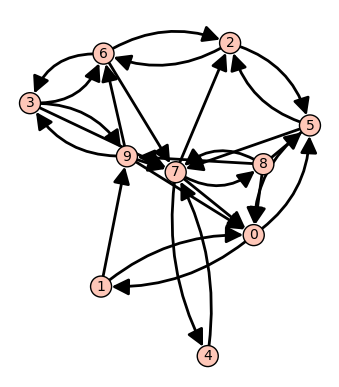

In [23]:
g.plot(layout='spring', iterations=10)

### We find self-segregation after evolving the network for a while with high homophily but not with low homophily

##### When State Space is the set of all networks

In [24]:
g1=copy(g)
EvolveHomophilousNetwork(g1,gc,0.99, 0.01, 500) # homophily is very high

10 29


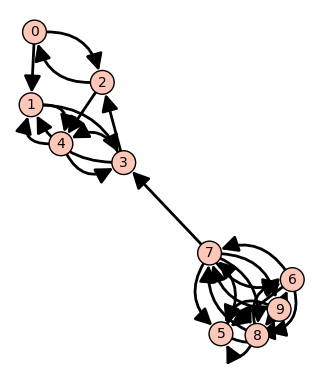

In [25]:
print g1.order(),g1.size()
g1.plot(layout='spring', iterations=20)

10 28


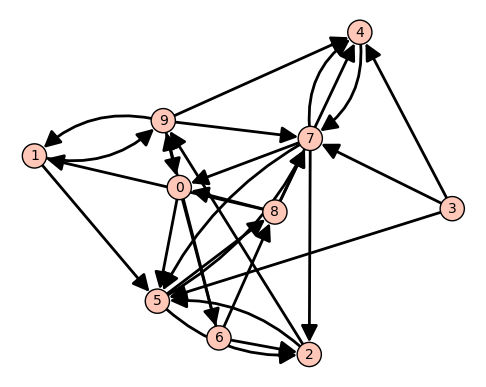

In [26]:
g2=copy(g)
EvolveHomophilousNetwork(g2,gc,0.1, 0.01, 100) # homophily is very low
print g2.order(),g2.size()
g2.plot(layout='spring', iterations=20)

##### When State Space is the set of all networks that have the same number of edges as the initial network

10 28
10 28


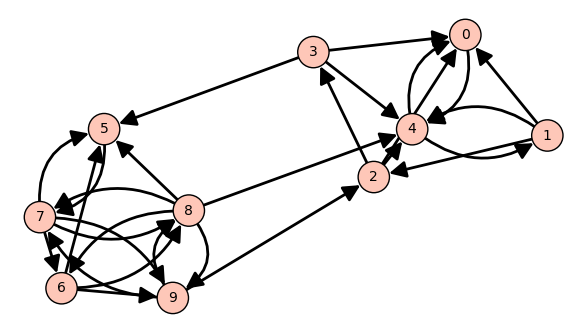

In [27]:
g1=copy(g)
print g1.order(),g1.size()
EvolveHomophilousNetworkWithConstantSize(g1,gc,0.99, 0.01, 1000) # homophily is very high
print g1.order(),g1.size()
g1.plot(layout='spring', iterations=20)

10 28
10 28


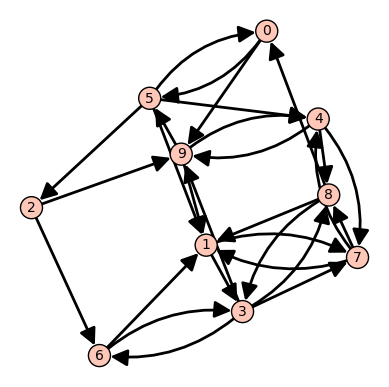

In [28]:
g2=copy(g)
print g2.order(),g2.size()
EvolveHomophilousNetworkWithConstantSize(g2,gc,0.1, 0.01, 1000) # homophily is very low
print g2.order(),g2.size()
g2.plot(layout='spring', iterations=20)

##### When State Space is the set of all networks - an example with more nodes

In [29]:
g=graphs.CompleteGraph(40).to_directed()
g.allow_loops(True)
g.multiple_edges(True)
print g.order(),g.size()
rEdges=thinEdges(g,0.10)
print g.order(),g.size()
gc = makeNodeColors(g,0.5)
gc

40 1560
40 145


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.])

40 145
40 146


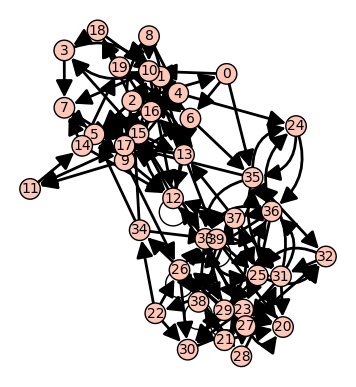

In [30]:
g1=copy(g)
print g1.order(),g1.size()
EvolveHomophilousNetwork(g1,gc,0.99, 0.1, 5000) # homophily is very high
print g1.order(),g1.size()
g1.plot(layout='spring', iterations=20)

40 145
40 145


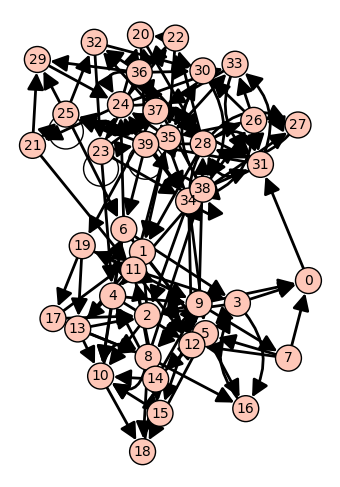

In [31]:
# with number of edgs preserved
g1=copy(g)
print g1.order(),g1.size()
EvolveHomophilousNetworkWithConstantSize(g1,gc,0.99, 0.1, 5000) # homophily is very high
print g1.order(),g1.size()
g1.plot(layout='spring', iterations=50, figsize=(5,5))

## Syntax from digraph docs

See the following for more detials.

* [http://doc.sagemath.org/html/en/reference/graphs/index.html](http://doc.sagemath.org/html/en/reference/graphs/index.html)
* [http://doc.sagemath.org/html/en/reference/graphs/sage/graphs/digraph.html](http://doc.sagemath.org/html/en/reference/graphs/sage/graphs/digraph.html)
* [http://doc.sagemath.org/html/en/reference/graphs/sage/graphs/graph_input.html](http://doc.sagemath.org/html/en/reference/graphs/sage/graphs/graph_input.html)

In [0]:
g.

In [0]:
g.edges?

In [0]:
g.edges()

In [0]:
g.add_edges?

In [0]:
g=graphs.CompleteGraph(4).to_directed()
print g.edges()
g.add_edges([(0,1)]) # Note that adding existing edges to a digraph does nothing to the digraph!
print g.edges()

In [0]:
g.delete_edges?

In [0]:
g=graphs.CompleteGraph(4).to_directed()
print g.edges()
g.delete_edges([(0,10)]) # Note that deleting non-existing edges to a digraph does nothing to the digraph!
print g.edges()

In [0]:
g=graphs.CompleteGraph(4).to_directed()
print g.edges()
g.delete_edges([(0,1),(1,3)])
print g.edges()

In [0]:
print g.edges()
g.add_edges([(0,1)])
print g.edges()

In [0]:
g.allows_multiple_edges() # we could get multigraphs with `G = Graph(multiedges=True,sparse=True); G` but let's work with digraphs without multiple edges for now...

In [0]:
g.allows_loops() # also let's not allow loops for now

In [0]:
g.am? # Returns the adjacency matrix of the (di)graph.

In [0]:
g.connected_component_containing_vertex?

In [0]:
g.connected_components?

In [0]:
g.connected_components_number?

In [0]:
g.connected_components_sizes?

In [0]:
g.connected_components_subgraphs?

In [0]:
g.copy?
#Warning: Please use this method only if you need to copy but
#  change the underlying implementation or weightedness.  Otherwise
#  simply do "copy(g)" instead of "g.copy()".

In [0]:
g.degree?

In [0]:
g.degree()

In [0]:
print g.in_degree()
print g.out_degree()

In [0]:
g.degree_histogram()

In [0]:
g.degree_sequence()

In [0]:
g.distance? # Returns the (directed) distance from u to v in the (di)graph, i.e. the length of the shortest path from u to v.

In [0]:
g.distance_all_pairs? # Returns the distances between all pairs of vertices.

In [0]:
g.distance_graph?

In [0]:
g.distance_matrix?

In [0]:
g.edges()

In [0]:
g.distance_matrix()

In [0]:
g.distances_distribution?

In [0]:
g.edges_incident?

In [0]:
print g.edges()
print g.edges_incident([0])
print g.edges_incident([0,3])

In [0]:
g.edge_boundary?

In [0]:
g.edge_disjoint_spanning_trees?

In [0]:
g.edge_labels?

In [0]:
g.edge_connectivity()

In [0]:
g.eigenspaces?

In [0]:
g.eigenvectors?

In [0]:
g.flow?

In [0]:
g.flow_polytope?

In [0]:
print g.has_edge((0,1))
print g.has_vertex(0)
g.get_vertices?

In [0]:
g.in_degree?

In [0]:
g.in_degree_iterator?

In [0]:
g.in_degree_sequence?

In [0]:
g.incoming_edge_iterator?

In [0]:
g.incoming_edges?

In [0]:
g.is_strongly_connected?

In [0]:
g.laplacian_matrix?

In [0]:
g.layout?

In [0]:
g = digraphs.ButterflyGraph(1)
g.layout()

In [0]:
g.level_sets?

In [0]:
g.latex_options?

In [0]:
g.lex_BFS?

In [0]:
g.min_spanning_tree?

In [0]:
g.multicommodity_flow?

In [0]:
g.neighbor_in_iterator?

In [0]:
g.neighbors_in?

In [0]:
g.edges()

In [0]:
g.neighbors_in(0)

In [0]:
g.neighbors_out(0)

In [0]:
g.neighbor_out_iterator?

In [0]:
g.num_edges()

In [0]:
g.num_verts()

In [0]:
g.order() # Returns the number of vertices.

In [0]:
g.out_degree?

In [0]:
g.out_degree(0)

In [0]:
g.out_degree_iterator?

In [0]:
g.outgoing_edges(0)

In [0]:
g.outgoing_edge_iterator?

In [0]:
g.parent()

In [0]:
g.plot?

In [0]:
g.plot3d?

In [0]:
g.random_edge?

In [0]:
g.random_edge_iterator?

In [0]:
g.random_vertex?

In [0]:
g.random_vertex_iterator?

In [0]:
g.relabel?

In [0]:
g.radius?

In [0]:
g.reverse_edge?

In [0]:
g.reverse_edges?

In [0]:
g.set_edge_label?

In [0]:
g.set_edge_label(0,1,'hi')
print g.edges()

In [0]:
g.set_edge_label(0,1,'shut the f*(-#| up!')
print g.edges()

In [0]:
g.set_planar_positions?

In [0]:
g.set_pos?

In [0]:
g.shortest_path?

In [0]:
g.show?

In [0]:
g.sinks?

In [0]:
g.sinks()

In [0]:
g.sources?

In [0]:
g.sources()

In [0]:
g.size?

In [0]:
g.size()

In [0]:
g.sinks()
g.sources()

In [0]:
g.strongly_connected_component_containing_vertex?

In [0]:
g.strongly_connected_components_digraph?

In [0]:
g.szeged_index?

In [0]:
g.tensor_product?

In [0]:
g.to_dictionary?

In [0]:
g.topological_sort?

In [0]:
g.traveling_salesman_problem?

In [0]:
g.triangles_count?

In [0]:
g.union?

In [0]:
g.vertex_boundary?

In [0]:
g.vertex_connectivity?

In [0]:
g.vertex_iterator?

In [0]:
g.vertices()

In [0]:
g.weighted?

In [0]:
g.copy?

In [0]:
gw = g.copy(weighted=True)
gw.edges()

In [0]:
gw.weighted_adjacency_matrix?

In [0]:
g.wiener_index?